# Final grade prediction
This work is implemented to predict final grade with a lot of interesting social, gender and study information about students. And in this work, I will try several of model to find the best one. Moreover, I visualize data before feeding forward because I want to know the relationship between variables and eliminate noise ones.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [3]:
with open("data.csv", "r") as f:
    data = pd.read_csv("data.csv")
    variables = data.columns
    print("Name of variables:")
    for i in variables:
        print(i)

Name of variables:
school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


There are 33 columns in our dataset, and **G3** is the final grade of students which is also our target.

## Pre-processing data for each columns
Converting categorical variables to continuous variables

In [4]:
pre_data = {}

school = list(data["school"])
for i in range(len(school)):
    if school[i] == "GP":
        school[i] = 0
    if school[i] == "MS":
        school[i] = 1

sex = list(data["sex"])
for i in range(len(school)):
    if sex[i] == "F":
        sex[i] = 0
    if sex[i] == "M":
        sex[i] = 1

address = list(data["address"])
for i in range(len(school)):
    if address[i] == "U":
        address[i] = 0
    if address[i] == "R":
        address[i] = 1

famsize = list(data["famsize"])
for i in range(len(school)):
    if famsize[i] == "LE3":
        famsize[i] = 0
    if famsize[i] == "GT3":
        famsize[i] = 1

Pstatus = list(data["Pstatus"])
for i in range(len(school)):
    if Pstatus[i] == "T":
        Pstatus[i] = 0
    if Pstatus[i] == "A":
        Pstatus[i] = 1

Mjob = list(data["Mjob"])
for i in range(len(school)):
    if Mjob[i] == "teacher":
        Mjob[i] = 0
    if Mjob[i] == "health":
        Mjob[i] = 1
    if Mjob[i] == "services":
        Mjob[i] = 2
    if Mjob[i] == "at_home":
        Mjob[i] = 3
    if Mjob[i] == "other":
        Mjob[i] = 4

Fjob = list(data["Fjob"])
for i in range(len(school)):
    if Fjob[i] == "teacher":
        Fjob[i] = 0
    if Fjob[i] == "health":
        Fjob[i] = 1
    if Fjob[i] == "services":
        Fjob[i] = 2
    if Fjob[i] == "at_home":
        Fjob[i] = 3
    if Fjob[i] == "other":
        Fjob[i] = 4

reason = list(data["reason"])
for i in range(len(school)):
    if reason[i] == "home":
        reason[i] = 0
    if reason[i] == "reputation":
        reason[i] = 1
    if reason[i] == "course":
        reason[i] = 2
    if reason[i] == "other":
        reason[i] = 3

guardian = list(data["reason"])
for i in range(len(school)):
    if guardian[i] == "mother":
        guardian[i] = 0
    if guardian[i] == "father":
        guardian[i] = 1
    if guardian[i] == "other":
        guardian[i] = 2

schoolsup = list(data["schoolsup"])
for i in range(len(school)):
    if schoolsup[i] == "yes":
        schoolsup[i] = 0
    if schoolsup[i] == "no":
        schoolsup[i] = 1

famsup = list(data["famsup"])
for i in range(len(school)):
    if famsup[i] == "yes":
        famsup[i] = 0
    if famsup[i] == "no":
        famsup[i] = 1

paid = list(data["paid"])
for i in range(len(school)):
    if paid[i] == "yes":
        paid[i] = 0
    if paid[i] == "no":
        paid[i] = 1

activities = list(data["activities"])
for i in range(len(school)):
    if activities[i] == "yes":
        activities[i] = 0
    if activities[i] == "no":
        activities[i] = 1

nursery = list(data["nursery"])
for i in range(len(school)):
    if nursery[i] == "yes":
        nursery[i] = 0
    if nursery[i] == "no":
        nursery[i] = 1

higher = list(data["higher"])
for i in range(len(school)):
    if higher[i] == "yes":
        higher[i] = 0
    if higher[i] == "no":
        higher[i] = 1

internet = list(data["internet"])
for i in range(len(school)):
    if internet[i] == "yes":
        internet[i] = 0
    if internet[i] == "no":
        internet[i] = 1

romantic = list(data["romantic"])
for i in range(len(school)):
    if romantic[i] == "yes":
        romantic[i] = 0
    if romantic[i] == "no":
        romantic[i] = 1

pre_vars = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "schoolsup", "famsup",
            "paid", "activities", "nursery", "higher", "internet", "romantic"]
for i in variables:
    if i not in pre_vars:
        pre_data[i] = list(data[i])
    else:
        exec("pre_data['%s'] = %s" % (i, i))

# for i in variables:
#     print(i, pre_data[i])

## Selection of input variables
There are two problem which we need to consider. The first is correlation and the second one is collinearity.

- Correlation between variables describe the relationship between two variables. If they are extremely correlated, then they are collinear. Autocorrelation occurs when a variable’s data affects another instance of that same variable (same column, different row). Linear regression only works if there is little or no autocorrelation in the dataset, and each instance is independent of each other.
- Multicollinearity exists when two or more of the predictors (x variables) in a regression model are moderately or highly correlated (different column). When one of our predictors is able to strongly predict another predictor or have weird relationships with each other (maybe x2 = x3 or x2 = 2(x3) + x4), then your regression equation is going to be a mess.

In this section, I visualize corellation matrix to view relationship between continuous variables

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

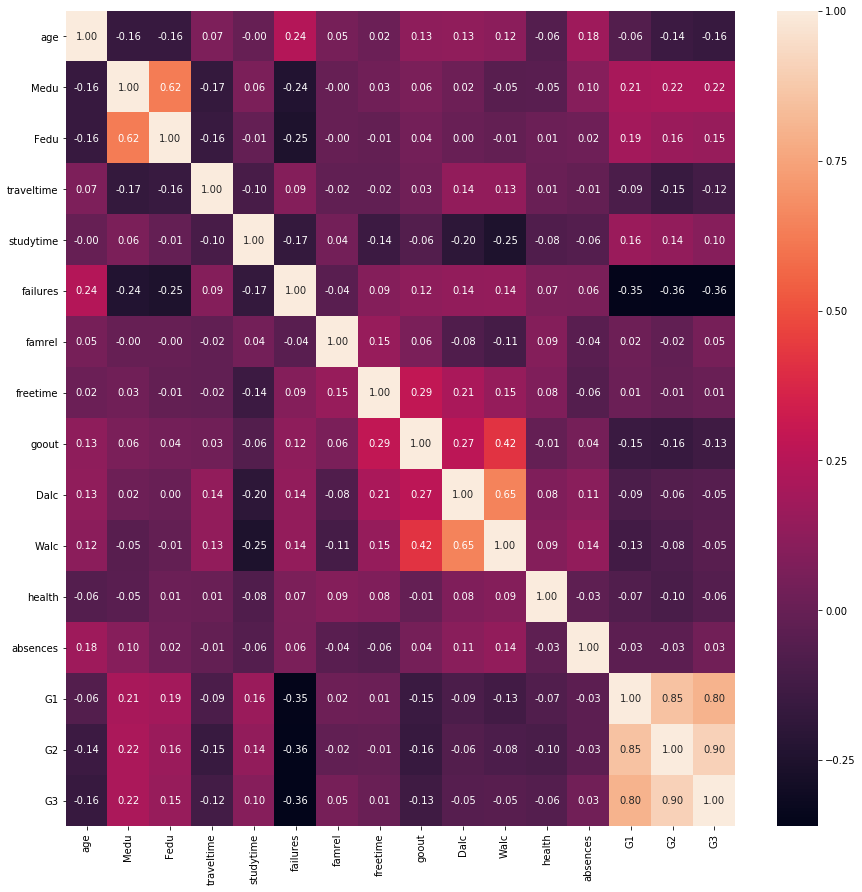

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [6]:
class data_loader(Dataset):
    def __init__(self, variables, pre_data):
        self.variables = variables
        self.pre_data = pre_data
        print(pre_data)

    def __getitem__(self, idx):
        data = []
        for i in self.variables:
            data.append(self.pre_data[i][idx])
        return data
data_loader = data_loader(variables, pre_data)
print(data_loader.__getitem__(0))


{'school': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0